In [16]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
from PIL import Image, ImageOps


In [17]:
path = './ES709_2005.tif'

In [41]:
def resize(path, size=224):
    ds = gdal.Open(path)
    im = np.nan_to_num(ds.ReadAsArray())
    im = (im * 255 / np.max(im)).astype('uint8')
    img = Image.fromarray(np.stack(im, axis=2))
    ratio = float(size/max(img.size))
    img = img.resize((int(ratio * img.size[0]), int(ratio * img.size[1])))
    return img

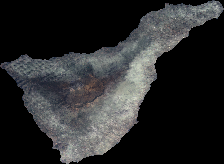

In [42]:
resize(path)

In [44]:
def resize_and_pad(path, size=224):
    img = resize(path, size)
    delta_w = size - img.size[0]
    delta_h = size - img.size[1]
    padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
    img = ImageOps.expand(img, padding)
    return img

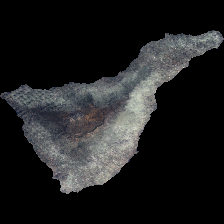

In [45]:
resize_and_pad(path)